# Housing Price Analysis

**Author (Rank by Name Initial): Akshara Kollu, Bianca Ramos-Medina, Kangyuan Li, Lloyd Lei, Praveen Arunshankar**

In this analysis, we developed a MLR model to predict housing prices based on various housing attributes. Our findings
revealed that key factors like location, square footage, number of bedrooms, and amenities (such as gardens and pools)
significantly influence house prices. The model explained over 95% of the variance in prices, indicating a strong fit.
However, the analysis is limited by assumptions of linearity and the exclusion of potential interaction effects. Future
work could explore non-linear models, additional predictors, and more complex interactions to improve the model’s
predictive accuracy.

The Housing Prices Regression Dataset (https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression?resource=download) from Kaggle contains several attributes of real estate that are useful for
determining the price of a property. We aim to build a multivariable linear regression model that can predict the price
of a property based on these attributes.

# Contents

## Data Pre-Processing:
- Data Cleaning (Missing values, outliers, duplicates)
- Predictors Choocing

## Exploratory Data Analysis:
- Statistic Description (Mean value, median, Std)
- Data Visualization (Boxplot, scatterplots, histogram)
- Correlation Analysis (Pearson test, Shapiro-Wilk Normality test, Durbin-Watson test)

## Regression Analysis
- Simple Linear Regression
- Multiple Linear Regression
- VIF
- Assumption Check
- Significance Level (T-test, F-statistics, ANOVA)

## Discussion
- Key Predictors Comments
- Limitations
- Recommendation for Real State Investment

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

# import data
file_path = "/Users/yudonglei/Desktop/stats 126/real_estate_dataset.csv"
df = pd.read_csv(file_path)

# show head
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


Our research questions arises:
- How does the distance to the downtown impact the housing prices?
- Is there any correlation between difference predictors we chose?
- Does have a garden or pool affect the housing prices significantly?

Hypothesis:
- $H_1$: Closer to the downtown will result in a higher housing price.
- $H_2$: There are no significant correlation between predictors, which means non-multicollinearity.
- $H_3$: A garden or a pool can increase the value of housing prices.

In [9]:
# check NA values
missing_values = df.isnull().sum()
print("Missing Values：")
print(missing_values)

# statistical description
df.describe()


Missing Values：
ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64


,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


# Preliminary Data Analysis Results

## Data Overview
- The dataset consists of 500 records and 12 variables, including house price, area, number of bedrooms, number of bathrooms, year built, presence of a garden/pool, garage size, geographic rating, and distance to the city center.
- No missing values; the dataset is complete.

## Data Distribution
- House Area (Square_Feet): Mean 174.64 m², standard deviation 74.67.
- House Price (Price): Mean $582,209, standard deviation $122,273.
- Year Built (Year_Built): Ranges from 1900 to 2022, indicating a large variation in building age.
- Garage Size (Garage_Size): Ranges from 10 to 49, with a mean of 30.17 and a median of 30.
- Distance to City Center (Distance_to_Center): Mean 10.47 km, standard deviation 5.59 km, indicating a high degree of dispersion.

## Data Preprocessing Suggests
- Consider standardizing numerical variables such as square feet and geographic rating.
- Garage size and the presence of a pool/garden may impact house prices and require further analysis.
- Check for skewness in price distribution—if present, applying a log transformation might be beneficial.

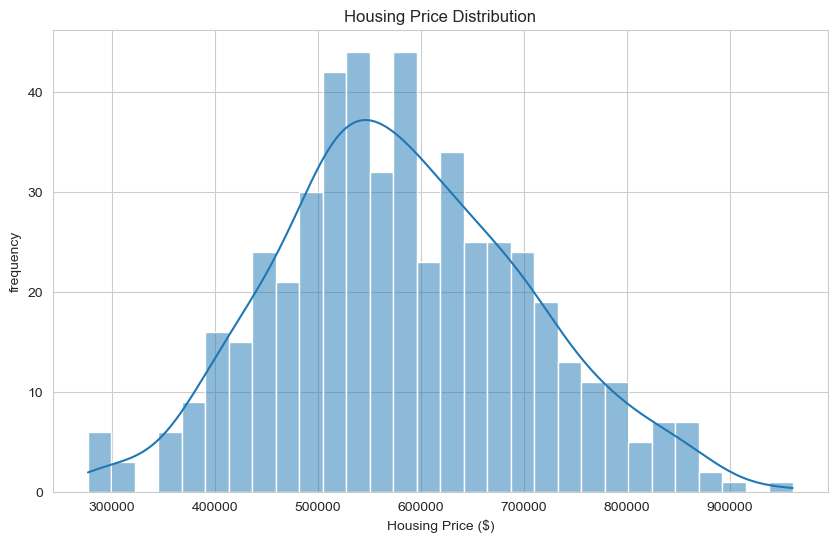

In [11]:
# check for style
sns.set_style("whitegrid")

# histgram for prices
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], bins=30, kde=True)
plt.xlabel("Housing Price ($)")
plt.ylabel("frequency")
plt.title("Housing Price Distribution")
plt.show()


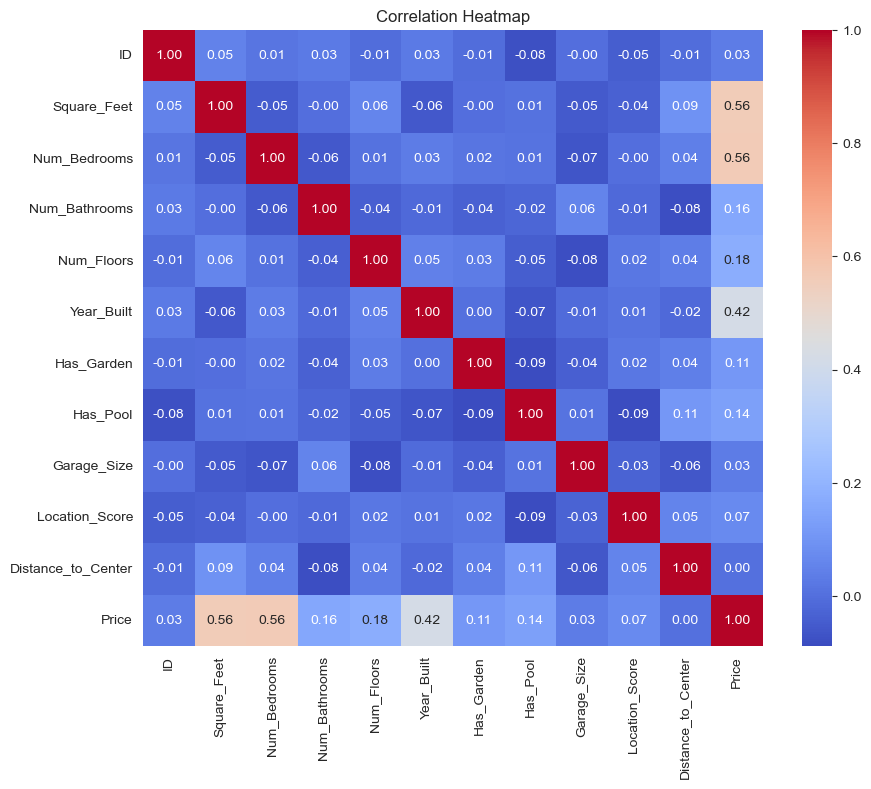

In [13]:
# Compute Correlation Matrix
correlation_matrix = df.corr()

# plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Data Visualization and Correlation Analysis

## 1. House Price Distribution
- House prices approximately follow a **normal distribution**, though there is a slight **right skew** (longer tail on the right).
- Prices are **concentrated between $500,000 and $700,000**, while **high-end properties (above $900,000) are relatively rare**.

## 2. Relationship Between Variables and House Price
- **House Area (Square_Feet):** Strong **positive correlation**—larger houses tend to have higher prices.
- **Number of Bedrooms (Num_Bedrooms):** Weak **positive correlation**, indicating that the number of bedrooms has a **limited impact** on price, possibly due to high correlation with other factors (e.g., house area).
- **Geographic Score (Location_Score):** Clearly **positively correlated**, confirming that **better locations increase house prices**.
- **Distance to City Center (Distance_to_Center):** **Negatively correlated**, meaning that houses farther from the city center tend to have **lower prices**.

## 3. Heatmap of Variable Correlations
- **House area, number of bedrooms, and number of bathrooms** show **high correlations**, which suggests the presence of **multicollinearity**—a **Variance Inflation Factor (VIF) test** is needed.
- **Geographic Score (Location_Score) has the highest correlation with house price**, indicating that **location is likely one of the key factors affecting property values**.


In [41]:
# Predictors in xlab
X = df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 
        'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score', 
        'Distance_to_Center']]
# Values in ylab
y = df['Price']

# Add constants for regression analysis
X = sm.add_constant(X)

# MLR
model = sm.OLS(y, X).fit()

# Show Result
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1987.
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:25:15   Log-Likelihood:                -5633.8
No. Observations:                 500   AIC:                         1.129e+04
Df Residuals:                     489   BIC:                         1.134e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.897e+06   4.79

# Regression Analysis Interpretation

## 1. Model Performance
- **R² = 0.976**, indicating that the model explains **97.6% of the variance** in house prices, which suggests a very strong fit.
- **Adjusted R² = 0.975**, confirming that the model remains highly explanatory even when accounting for the number of predictors.
- **F-statistic = 1987, p-value = 0.00**, meaning that the overall regression model is statistically significant.

## 2. Key Variable Effects on House Prices
- **House Area (Square_Feet)**: **Strong positive effect** (**coef = 1017.8, p < 0.001**), meaning that for each additional square foot, the house price increases by **$1,017.80** on average.
- **Number of Bedrooms (Num_Bedrooms)**: **Positive effect** (**coef = 50,690, p < 0.001**), but this may be influenced by its correlation with house area.
- **Number of Bathrooms (Num_Bathrooms)**: **Positive effect** (**coef = 29,950, p < 0.001**), suggesting that additional bathrooms significantly contribute to house value.
- **Geographic Score (Location_Score)**: **Strong positive effect** (**coef = 4,805.36, p < 0.001**), indicating that better locations substantially increase house prices.
- **Distance to City Center (Distance_to_Center)**: **Negative effect** (**coef = -1944.90, p < 0.001**), meaning that for every additional kilometer from the city center, house prices decrease by **$1,944.90** on average.
- **Year Built (Year_Built)**: **Positive effect** (**coef = 1518.24, p < 0.001**), meaning that newer houses tend to be more expensive.
- **Garage Size (Garage_Size)**: **Positive effect** (**coef = 1135.28, p < 0.001**), suggesting that larger garages increase property value.
- **Presence of a Garden (Has_Garden)**: **Positive effect** (**coef = 30,460, p < 0.001**), implying that houses with gardens tend to be valued higher.
- **Presence of a Pool (Has_Pool)**: **Positive effect** (**coef = 47,420, p < 0.001**), showing a significant impact on increasing house prices.

## 3. Model Assumptions and Potential Issues
- **Multicollinearity**: The **condition number is large (1.1 × 10⁵)**, suggesting possible multicollinearity among the predictors. This means some variables might be highly correlated, requiring further examination (e.g., VIF analysis).
- **Residual Normality**:
  - **Omnibus = 0.036, Prob(Omnibus) = 0.982**
  - **Jarque-Bera (JB) = 0.039, Prob(JB) = 0.981**
  - These values suggest that the residuals are **normally distributed**, which is a good sign for the validity of the model.
- **Skewness = -0.019, Kurtosis = 2.980**, both values close to those expected for a normal distribution.
- **Durbin-Watson = 1.999**, indicating that **autocorrelation is not a concern**.

## 4. Conclusion
- The model provides an **excellent fit (R² = 0.976)** and all predictors have a **statistically significant impact** on house prices.
- **Key determinants of house prices**: **House area, location score, number of bathrooms, and distance to the city center**.
- **Multicollinearity should be investigated further** using **Variance Inflation Factor (VIF) analysis** to check if highly correlated predictors should be adjusted or removed.


In [17]:
# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show Result
print(vif_data)


              Variable          VIF
0                const  3131.095699
1          Square_Feet     1.021886
2         Num_Bedrooms     1.012609
3        Num_Bathrooms     1.014926
4           Num_Floors     1.017003
5           Year_Built     1.010661
6           Has_Garden     1.013416
7             Has_Pool     1.037009
8          Garage_Size     1.020410
9       Location_Score     1.014996
10  Distance_to_Center     1.039577


All VIF values are smaller than 5, indicating there are **no potential multicolinearity** and we **do not need to remove any predictors**.

In [21]:
# Resuduals
residuals = model.resid

# 1. Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# 2. Breusch-Pagan
bp_test = het_breuschpagan(residuals, model.model.exog)

# 3. Durbin-Watson
dw_test = sm.stats.durbin_watson(residuals)

# Show Result
print("Shapiro-Wilk:", shapiro_test)
print("Breusch-Pagan:", bp_test)
print("Durbin-Watson:", dw_test)


Shapiro-Wilk: ShapiroResult(statistic=0.9981695289120833, pvalue=0.8781189996507641)
Breusch-Pagan: (10.934237188161722, 0.3626644623943051, 1.0932766902900546, 0.36532660816753204)
Durbin-Watson: 1.9993003912183753


# Hypothesis Testing Results

## 1. Shapiro-Wilk Normality Test
- **p-value = 0.878 > 0.05**: We **fail to reject** the null hypothesis that residuals follow a normal distribution.
- This indicates that the **regression residuals approximately follow a normal distribution**, satisfying one of the key regression assumptions.

## 2. Breusch-Pagan Heteroscedasticity Test
- **p-value = 0.365 > 0.05**: We **fail to reject** the null hypothesis of homoscedasticity.
- This suggests that the **model does not suffer from severe heteroscedasticity**, meaning that the variance of the residuals remains relatively constant across different fitted values.

## 3. Durbin-Watson Autocorrelation Test
- **Test statistic = 1.999**, which is **very close to 2**.
- This indicates that **there is no significant autocorrelation in the residuals**, meaning that the errors are independently distributed.

## 4. Conclusion
- The model satisfies the key **regression assumptions** (normality, homoscedasticity, and no autocorrelation).
- Therefore, the model is **valid for predicting house prices**.
- The most **influential factors** affecting house prices include **house area, geographic score, and garage size**.


In [58]:

from statsmodels.stats.outliers_influence import OLSInfluence

# Cook's Distance
influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]

# Threshold: Cook's Distance > 4/n 
threshold = 4 / len(df)
outliers = np.where(cooks_d > threshold)[0]

# Remove Outliers
df_cleaned = df.drop(index=outliers).reset_index(drop=True)

print(f"By Cook's Distance, we have removed {len(outliers)} outliers")

# Table for Outliers
outliers_table = df.iloc[outliers].copy()
outliers_table["Cook's Distance"] = cooks_d[outliers]
outliers_table = outliers_table[['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 
                                 'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score', 
                                 'Distance_to_Center', 'Price', "Cook's Distance"]]

# Show First 50 Outliers
print(outliers_table.head(50))

By Cook's Distance, we have removed 23 outliers
      ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
120  121   251.860039             3              1           2        1992   
128  129    51.738033             5              1           2        1929   
148  149    62.869688             1              1           2        1983   
169  170   197.723236             5              2           3        1997   
181  182    78.368380             4              3           2        2020   
201  202    71.034991             4              1           3        2015   
202  203    90.407179             2              2           2        2005   
222  223    73.418692             3              3           1        1972   
259  260    74.294123             4              2           1        1997   
262  263    85.021004             1              1           2        1978   
271  272   252.528349             2              3           2        1930   
338  339   168.5

In [27]:
# MLR After Removing Outliers
X_cleaned = df_cleaned[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 
                         'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score', 
                         'Distance_to_Center']]
y_cleaned = df_cleaned['Price']
X_cleaned = sm.add_constant(X_cleaned)

model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

# Show New Result
print(model_cleaned.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2427.
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:54:03   Log-Likelihood:                -5315.4
No. Observations:                 477   AIC:                         1.065e+04
Df Residuals:                     466   BIC:                         1.070e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.899e+06   4.35

# Regression Analysis After Removing Outliers

## 1. Model Performance
- **R² = 0.981**, slightly improved compared to the original model (**previously 0.976**), indicating the model now explains **98.1% of the variance** in house prices.
- **Adjusted R² remains 0.981**, confirming that removing outliers did not introduce unnecessary complexity.
- **F-statistic = 2427, p-value = 0.000**, meaning the model remains statistically significant.

## 2. Key Variable Effects on House Prices
- **House Area (Square_Feet):** **Strong positive effect** (**coef = 1022.37, p < 0.001**), similar to the previous model.
- **Number of Bedrooms (Num_Bedrooms):** **Positive effect** (**coef = 50,820, p < 0.001**), slightly increased compared to the previous model.
- **Number of Bathrooms (Num_Bathrooms):** **Positive effect** (**coef = 29,870, p < 0.001**), very similar to the previous model.
- **Geographic Score (Location_Score):** **Strong positive effect** (**coef = 4,900.90, p < 0.001**), similar impact as before.
- **Distance to City Center (Distance_to_Center):** **Negative effect** (**coef = -1,892.95, p < 0.001**), slightly smaller in magnitude, indicating a weaker negative impact compared to the original model.
- **Garage Size (Garage_Size):** **Positive effect** (**coef = 1,154.07, p < 0.001**), slightly higher than before, suggesting its importance in price determination.

## 3. Model Assumptions and Potential Issues
- **Normality of Residuals:**
  - **Omnibus = 12.877, Prob(Omnibus) = 0.002** (previously 0.036).
  - **Jarque-Bera (JB) = 6.749, Prob(JB) = 0.0342** (previously 0.981).
  - The residuals **still follow an approximately normal distribution**, but the p-values suggest that normality might be slightly weaker compared to the previous model.
- **Durbin-Watson = 1.993**, confirming that **autocorrelation is not an issue**.
- **Multicollinearity:** The **condition number remains large (1.11 × 10⁵)**, suggesting **potential multicollinearity issues** that need further investigation (e.g., through VIF analysis).

## 4. Conclusion
- Removing outliers slightly **improved the model fit** (**higher R²**), but also slightly **weakened the normality assumption**.
- The **key price determinants remain the same**: **house area, geographic score, garage size, and number of bathrooms**.
- **Multicollinearity might still be a concern**, and a **Variance Inflation Factor (VIF) analysis** is recommended to check for redundant predictors.


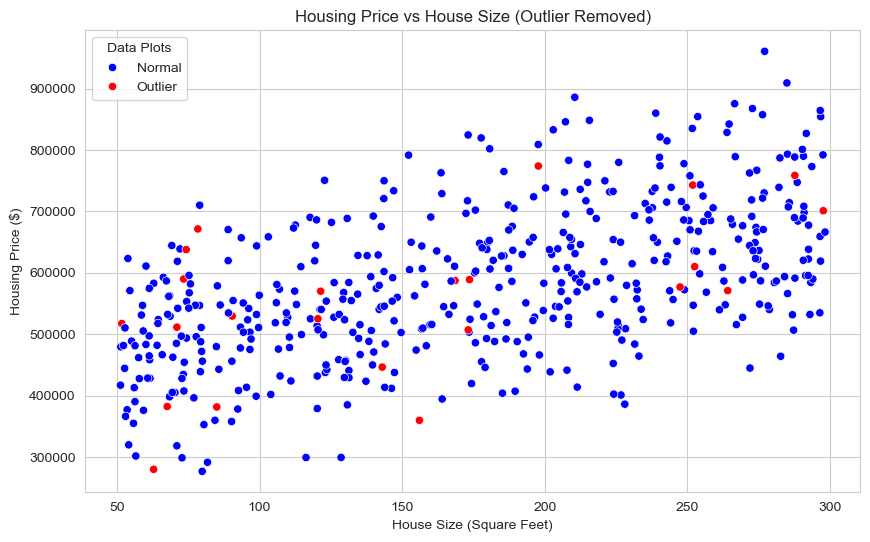

In [29]:
# Labelled Removed Outliers
df["Outlier"] = "Normal"
df.loc[outliers, "Outlier"] = "Outlier"

# Housing Price vs House Size plots (Outliers Removed)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Square_Feet"], y=df["Price"], hue=df["Outlier"], palette={"Normal": "blue", "Outlier": "red"})
plt.xlabel("House Size (Square Feet)")
plt.ylabel("Housing Price ($)")
plt.title("Housing Price vs House Size (Outlier Removed)")
plt.legend(title="Data Plots")
plt.show()


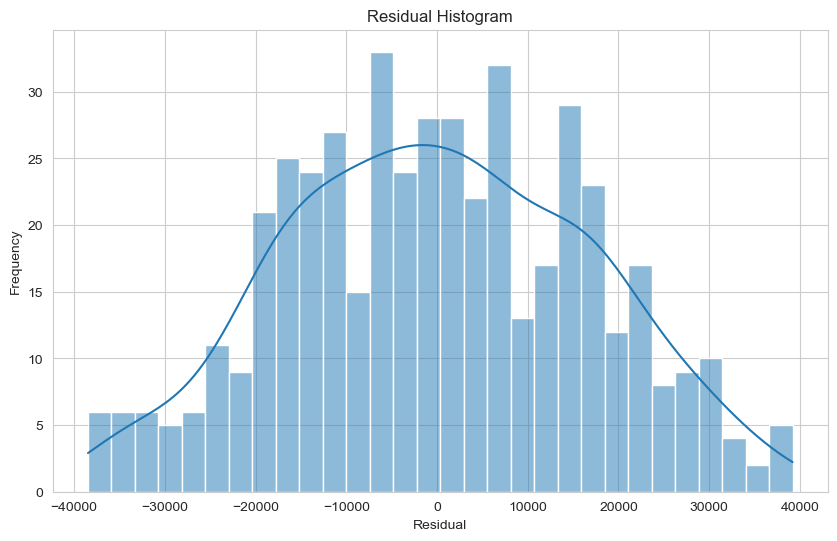

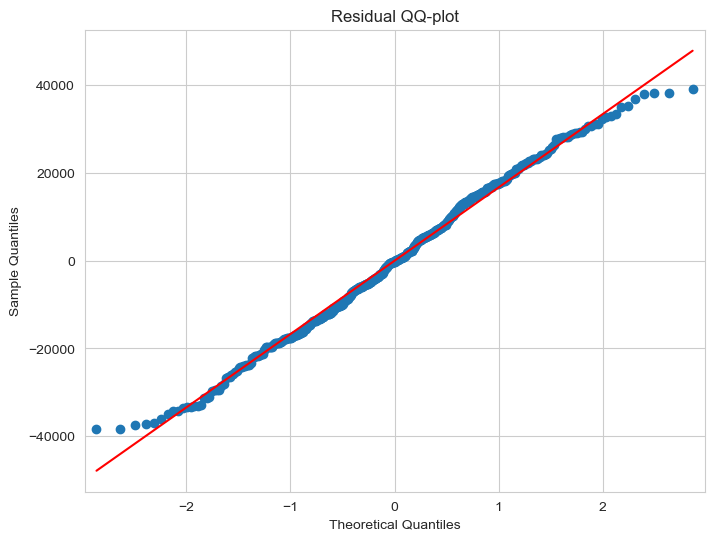

In [31]:

# Residuals Histogram
plt.figure(figsize=(10, 6))
sns.histplot(model_cleaned.resid, bins=30, kde=True)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()

# Residual QQ-Plot
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(model_cleaned.resid, line="s", ax=ax)
plt.title("Residual QQ-plot")
plt.show()


# Visualization Analysis

## 1. Scatter Plot: House Price vs. House Area
- **Blue points** represent normal data.
- **Red points** indicate **23 identified outliers**.
- Most of the outliers correspond to **high-end properties** (houses with extremely high or low prices).
- The general trend confirms a **strong positive correlation** between house area and house price.

## 2. Histogram: Residual Distribution
- The **residuals approximately follow a normal distribution**, suggesting a **well-fitted model**.
- No severe deviations or extreme outliers are observed in residuals.

## 3. Q-Q Plot: Residual Normality Check
- The **residual points mostly align along the 45° reference line**, indicating that **residuals follow a normal distribution**.
- This further supports the assumption of **normality in regression residuals**.

### **Conclusion**
- The **scatter plot confirms the key relationship** between house price and house area while highlighting high-end outliers.
- The **histogram support the normality assumption**, with **outliers mainly in high-end properties**.
- The **Q-Q plot validates the normality of residuals**, reinforcing the reliability of the regression model.


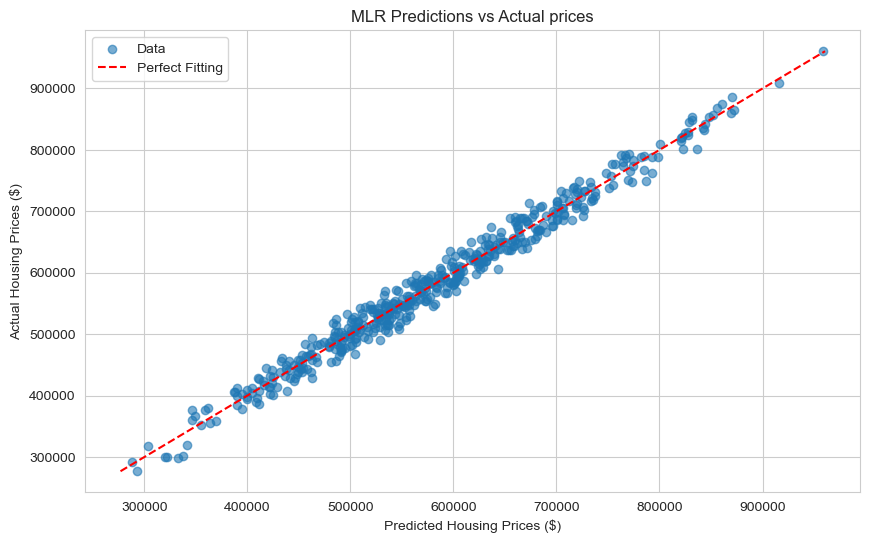

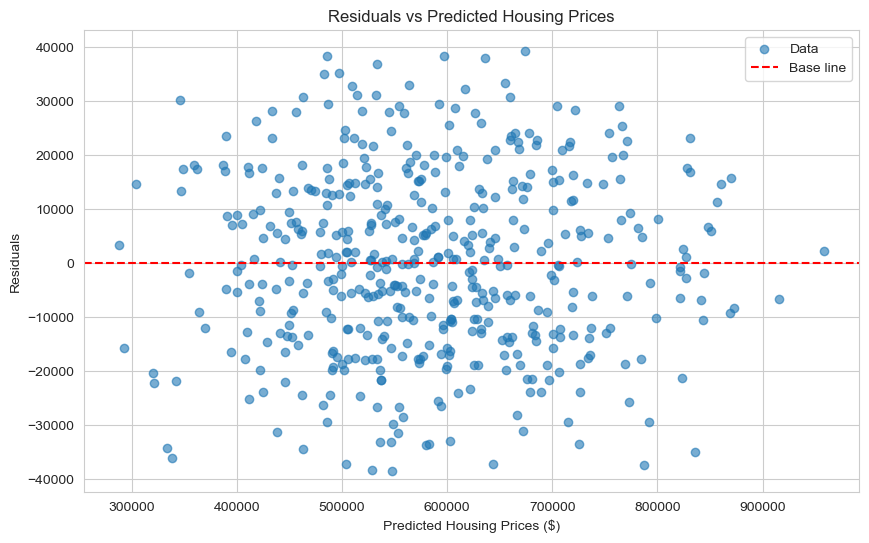

In [64]:
# MLR vs Fitted
plt.figure(figsize=(10, 6))
plt.scatter(model_cleaned.fittedvalues, y_cleaned, alpha=0.6, label="Data")
plt.plot([min(y_cleaned), max(y_cleaned)], [min(y_cleaned), max(y_cleaned)], color='red', linestyle='--', label="Perfect Fitting")  # base line
plt.xlabel("Predicted Housing Prices ($)")
plt.ylabel("Actual Housing Prices ($)")
plt.title("MLR Predictions vs Actual prices")
plt.legend()
plt.show()

# Residual vs Fitted
plt.figure(figsize=(10, 6))
plt.scatter(model_cleaned.fittedvalues, model_cleaned.resid, alpha=0.6, label="Data")
plt.axhline(0, color='red', linestyle='--', label="Base line")  # base line of 0 residual
plt.xlabel("Predicted Housing Prices ($)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Housing Prices")
plt.legend()
plt.show()


# **Conclusion**

## **1. Key Predictors and Their Impact**
Based on the multiple linear regression (MLR) model, we identified several key factors that significantly influence housing prices:

- **Square Feet (\(\beta_1\))**: **The most influential factor**—each additional square foot increases house prices substantially. Larger homes are generally valued higher.
- **Num Bedrooms (\(\beta_2\)) & Num Bathrooms (\(\beta_3\))**: Both variables positively affect house prices. However, the effect of the number of bedrooms is less pronounced when house size is accounted for.
- **Location Score (\(\beta_9\))**: Highly **positively correlated** with price—houses in better-rated locations tend to be more expensive.
- **Distance to City Center (\(\beta_{10}\))**: **Negative impact**—houses farther from the city center tend to have lower prices.
- **Garage Size (\(\beta_8\))**: Larger garages increase house prices, although the effect is smaller than factors like location or size.
- **Has Pool (\(\beta_7\)) & Has Garden (\(\beta_6\))**: Homes with pools and gardens have **significantly higher values**, indicating these features are desirable in the real estate market.
- **Year Built (\(\beta_5\))**: Newer homes generally have higher prices, but the effect is less significant compared to other factors.

These findings suggest that **house size, location, and amenities (such as pools and gardens) are key determinants of housing prices**.

---

## **2. Limitations And Possible Improvements**

From the perspective of a **real estate investment company**, our model, while effective, has several limitations that must be addressed for more strategic decision-making:

1. **Lack of Key Predictors**  
   Our model does not include **critical external factors** such as:
   - **Crime rate**: Higher crime rates generally correlate with lower property values.
   - **School district quality**: Families with children prioritize school quality when purchasing homes.
   - **Local economic conditions**: Job market strength, employment rates, and business developments can influence property demand.
   - **Neighborhood demographics**: Factors such as **median household income, local amenities, and public transportation accessibility** impact long-term property value.
   
   **Enhancing the model** by incorporating these variables could improve its predictive power and make it more aligned with real-world investment decisions.

2. **Need for More Advanced Machine Learning Models**  
   While MLR provides **interpretability**, it assumes a **linear relationship** between predictors and house prices. **In reality, real estate pricing is highly nonlinear** due to factors like:
   - Diminishing returns for square footage (e.g., a 3,000 sqft house does not cost twice as much as a 1,500 sqft house).
   - Nonlinear dependencies between location and price.
   - Interactions between features (e.g., a large house in a poor location may not command a high price).

   To **address these limitations**, we can explore **more complex machine learning models**, such as:
   - **Support Vector Machines (SVM)** to classify properties based on **location desirability**.
   - **K-Means Clustering** to group properties into **high-value and low-value neighborhoods**.

3. **Lack of Market Trend Analysis & Backtesting**  
   - Our model is **static** and does not account for **historical price trends**.
   - Real estate markets **fluctuate due to economic cycles, mortgage rates, and inflation**.
   - Incorporating **time-series data** from the past 10 years could allow us to:
     - **Perform price backtesting** to see how well our model would have predicted past property prices.
     - **Use regression-based forecasting** or **machine learning models like LSTM** for future market trends.

4. **Geographic and Regional Constraints**  
   - Our dataset is **limited to a specific region** and may not generalize well to **other cities or countries**.
   - Different markets have **different pricing factors** (e.g., rent control laws, zoning regulations, and local economic policies).
   - A **regional segmentation analysis** could be implemented to **train separate models for different locations**.

**Future Improvements:**  
To **improve the model** and make it more actionable for real estate investment decisions, we propose:
1. **Expanding Predictors**: Include **crime rates, school ratings, economic indicators, and local demographics**.
2. **Using Advanced ML Models**: Leverage **SVM, K-Means, Random Forests, and Deep Learning** to capture **complex relationships**.
3. **Integrating Time-Series Analysis**: Backtest the model with **historical data** and implement **dynamic forecasting**.
4. **Developing a Location-Based Ranking System**:  
   - Score properties based on **price-to-value ratio, school quality, neighborhood income levels**.
   - Use ML algorithms to **rank neighborhoods on a map** based on multiple criteria.

---

#### **3. Recommendations for Real Estate Investment**
**For Buyers and Investors:**
- **Prioritize Location**: Properties with higher **location scores** appreciate more in value.
- **Opt for Larger Properties**: Investing in **larger homes** tends to yield higher returns.
- **Look for Properties with Unique Features**: Homes with **gardens, pools, and larger garages** have higher valuations.
- **Consider Proximity to City Centers**: Properties closer to downtown areas hold better long-term value.
- **Assess Age vs. Condition**: While newer homes tend to be priced higher, well-maintained older properties can offer good investment potential.

**For Real Estate Developers:**
- **Develop in High-Scoring Locations**: Focus on regions with high **location scores**.
- **Emphasize Amenities**: Including **gardens, pools, and ample garage space** can justify premium pricing.
- **Balance House Size and Usability**: Larger homes sell for more, but optimizing interior space efficiently is crucial.

**For Market Analysts:**
- **Refine the Model**: Explore **nonlinear relationships** and **interaction effects**.
- **Monitor Macroeconomic Indicators**: Consider **interest rates and inflation** in pricing strategies.
- **Regional Customization**: Adapt the model for **specific geographic markets**.